# Pytorch gradient

This section covers the PyTorch <a href='https://pytorch.org/docs/stable/autograd.html'><strong><tt>autograd</tt></strong></a> implementation of gradient descent. Tools include:
* <a href='https://pytorch.org/docs/stable/autograd.html#torch.autograd.backward'><tt><strong>torch.autograd.backward()</strong></tt></a>
* <a href='https://pytorch.org/docs/stable/autograd.html#torch.autograd.grad'><tt><strong>torch.autograd.grad()</strong></tt></a>

When an operation finishes you can call .backward() and have all the gradients computed automatically. The gradient for a tensor will be accumulated into its .grad attribute.



In [73]:
import torch

In [74]:
x = torch.tensor(2.0, requires_grad=True)
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1
x.dtype, y

(torch.float32, tensor(63., grad_fn=<AddBackward0>))

In [75]:
y.backward()
# x.grad = f'(x)
x.grad

tensor(93.)

In [76]:
# x -> y -> z -> out
x = torch.tensor([[1.,2,3],[3,2,1]], requires_grad=True)
print('x is ', x, "\n")
y = 3*x + 2
z = 2*y**2
print('z is ', z, '\n')
out = z.mean()
print('out is ', out, '\n')

x is  tensor([[1., 2., 3.],
        [3., 2., 1.]], requires_grad=True) 

z is  tensor([[ 50., 128., 242.],
        [242., 128.,  50.]], grad_fn=<MulBackward0>) 

out is  tensor(140., grad_fn=<MeanBackward0>) 



In [77]:
out.backward()
x.grad

tensor([[10., 16., 22.],
        [22., 16., 10.]])

# Linear Regression with PyTorch
To start, we'll develop a collection of data points that appear random, but that fit a known linear equation  𝑦=2𝑥+1

In [78]:
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [79]:
X = torch.linspace(1, 50, 50).reshape(-1, 1)
# random array of error values
torch.manual_seed(71)
e = torch.randint(-8, 9, (50, 1), dtype=torch.float)
X, e, e.sum()

(tensor([[ 1.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.],
         [11.],
         [12.],
         [13.],
         [14.],
         [15.],
         [16.],
         [17.],
         [18.],
         [19.],
         [20.],
         [21.],
         [22.],
         [23.],
         [24.],
         [25.],
         [26.],
         [27.],
         [28.],
         [29.],
         [30.],
         [31.],
         [32.],
         [33.],
         [34.],
         [35.],
         [36.],
         [37.],
         [38.],
         [39.],
         [40.],
         [41.],
         [42.],
         [43.],
         [44.],
         [45.],
         [46.],
         [47.],
         [48.],
         [49.],
         [50.]]), tensor([[ 2.],
         [ 7.],
         [ 2.],
         [ 6.],
         [ 2.],
         [-4.],
         [ 2.],
         [-5.],
         [ 4.],
         [ 1.],
         [ 2.],
         [ 3.],
       

In [80]:
y = 2*X + e
y.shape, X.shape, e.shape, y

(torch.Size([50, 1]), torch.Size([50, 1]), torch.Size([50, 1]), tensor([[ 4.],
         [11.],
         [ 8.],
         [14.],
         [12.],
         [ 8.],
         [16.],
         [11.],
         [22.],
         [21.],
         [24.],
         [27.],
         [27.],
         [20.],
         [35.],
         [37.],
         [28.],
         [36.],
         [31.],
         [32.],
         [39.],
         [43.],
         [48.],
         [42.],
         [47.],
         [55.],
         [56.],
         [59.],
         [62.],
         [65.],
         [63.],
         [71.],
         [72.],
         [67.],
         [64.],
         [67.],
         [71.],
         [83.],
         [78.],
         [88.],
         [81.],
         [82.],
         [88.],
         [80.],
         [89.],
         [98.],
         [86.],
         [93.],
         [91.],
         [98.]]))

Text(0, 0.5, 'y')

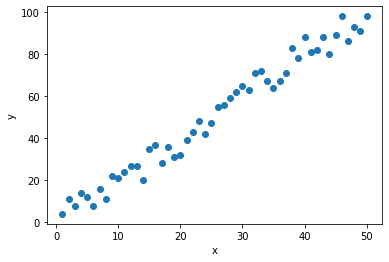

In [81]:
# have to convert tensors to numpy arrays for plotting
plt.scatter(X.numpy(), y.numpy())
plt.xlabel('x')
plt.ylabel('y')

## Simple Linear Model

nn.Linear() and initiate random weights and bias

In [82]:
torch.manual_seed(59)
model = nn.Linear(in_features=1, out_features=1)
model.weight, model.bias

(Parameter containing:
 tensor([[0.1060]], requires_grad=True), Parameter containing:
 tensor([0.9638], requires_grad=True))

## Model classes
PyTorch lets us define models as object classes 

In [83]:
class Model(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__()
    self.linear = nn.Linear(in_features, out_features)

  def forward(self, x):
    y_pred = self.linear(x)
    return y_pred

In [84]:
# source code
torch.optim.SGD??

In [85]:
torch.manual_seed(59)
model = Model(1, 1)
print(model)
print('Weight: ', model.linear.weight.item())
print('Bias: ', model.linear.bias.item())

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight:  0.10597813129425049
Bias:  0.9637961387634277


In [86]:
for name, param in model.named_parameters():
  print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [87]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
x = torch.tensor([2.0])
x1 = np.array([X.min(),X.max()])
y1 = x1*w1 + b1
model.forward(x), y1

(tensor([1.1758], grad_fn=<AddBackward0>),
 array([1.0697743, 6.2627025], dtype=float32))

Text(0, 0.5, 'y')

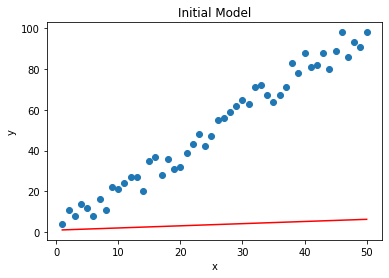

In [88]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1, y1, 'r')

plt.title('Initial Model')
plt.xlabel('x')
plt.ylabel('y')

## Set the loss function
Mean Squared Error (MSE)

We could write our own function to apply a Mean Squared Error (MSE) that follows<br>

<em>By convention, you'll see the variable name "criterion" used, but feel free to use something like "linear_loss_func" if that's clearer.</em>

In [89]:
criterion = nn.MSELoss()

In [90]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
w1, b1

(0.10597813129425049, 0.9637961387634277)

## Set the optimization
Here we'll use <a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent'>Stochastic Gradient Descent</a> (SGD) with an applied <a href='https://en.wikipedia.org/wiki/Learning_rate'>learning rate</a> (lr) of 0.001. Recall that the learning rate tells the optimizer how much to adjust each parameter on the next round of calculations. Too large a step and we run the risk of overshooting the minimum, causing the algorithm to diverge. Too small and it will take a long time to converge.

For more complicated (multivariate) data, you might also consider passing optional <a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Momentum'><tt>momentum</tt></a> and <a href='https://en.wikipedia.org/wiki/Tikhonov_regularization'><tt>weight_decay</tt></a> arguments. Momentum allows the algorithm to "roll over" small bumps to avoid local minima that can cause convergence too soon. Weight decay (also called an L2 penalty) applies to biases.

For more information, see <a href='https://pytorch.org/docs/stable/optim.html'><strong><tt>torch.optim</tt></strong></a>

In [91]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)


## Train the model
An <em>epoch</em> is a single pass through the entire dataset. 

In [92]:
epochs = 50
losses = []

for i in range(epochs):
  i += 1
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  losses.append(loss)
  print(f'epoch: {i:2} losses: {loss.item():10.8f} weight/l {model.linear.weight.item():10.8f} \
  bias: {model.linear.bias.item():10.8f}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch:  1 losses: 2961.54931641 weight/l 0.10597813   bias: 0.96379614
epoch:  2 losses: 1538.90466309 weight/l 3.28390026   bias: 1.05846369
epoch:  3 losses: 804.44372559 weight/l 1.00050199   bias: 0.99086785
epoch:  4 losses: 425.26818848 weight/l 2.64114594   bias: 1.03986049
epoch:  5 losses: 229.51327515 weight/l 1.46230531   bias: 1.00508237
epoch:  6 losses: 128.45195007 weight/l 2.30930805   bias: 1.03049469
epoch:  7 losses: 76.27752686 weight/l 1.70071089   bias: 1.01265895
epoch:  8 losses: 49.34167862 weight/l 2.13798475   bias: 1.02589738
epoch:  9 losses: 35.43561172 weight/l 1.82378435   bias: 1.01680839
epoch: 10 losses: 28.25643349 weight/l 2.04952955   bias: 1.02376175
epoch: 11 losses: 24.55003166 weight/l 1.88731539   bias: 1.01918817
epoch: 12 losses: 22.63649940 weight/l 2.00385618   bias: 1.02289665
epoch: 13 losses: 21.64858818 weight/l 1.92010748   bias: 1.02065420
epoch: 14 losses: 21.13854980 weight/l 1.98026967   bias: 1.02268744
epoch: 15 losses: 20.87519

## Plot the loss values
Let's see how loss changed over time

Text(0.5, 0, 'epoch')

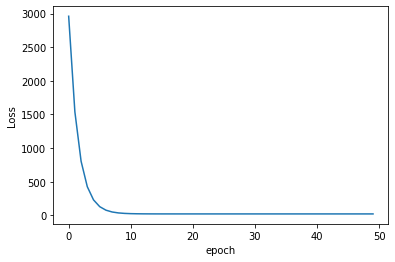

In [93]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

## Plot the result

In [94]:
w1, b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Current weight: {w1:.8f}, Current bias: {b1: .8f}')

y1 = x1*w1 + b1
x1, y1

Current weight: 1.95484495, Current bias:  1.03094006


(array([ 1., 50.], dtype=float32),
 array([ 2.985785, 98.773186], dtype=float32))

In [95]:
# torch.optim??

Text(0.5, 1.0, 'current model')

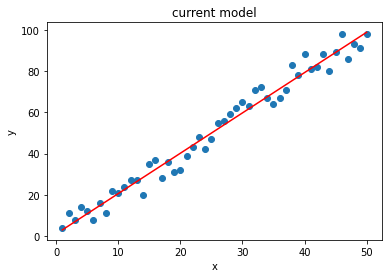

In [104]:
plt.scatter(X, y)
plt.plot(x1, y1, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('current model')